# Imports

In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Creating Dataset

In [ ]:



face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

cap = cv2.VideoCapture(0)
count = 0
while True:
    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        # Saving the file
        file_name_path = 'data/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)
        #count on image display
        cv2.putText(face, str(count), (64, 64), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Cropped Faces', face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count == 20: #13 is Enter
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

# Comparing different Models

## Providing directory

In [2]:
IMAGE_SIZE = [64, 64]

train_path = os.path.join('./dataset/Train')
test_path = os.path.join('./dataset/Test')

INPUT_SIZE = IMAGE_SIZE + [3]

## Custom Model

In [3]:


# model = Sequential([
#     Input(shape=INPUT_SIZE),
#     Conv2D(8, 7, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     MaxPooling2D(),
#     Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     Dropout(rate=0.3),
#     Conv2D(8, 7, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     Flatten(),
#     Dense(5, activation='softmax')
# ])
model=Sequential([
Input(shape=INPUT_SIZE),
Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
BatchNormalization(),
Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
BatchNormalization(),
Dropout(0.25),
Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.25),
Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
BatchNormalization(),
Dropout(0.25),
Flatten(),
Dense(512, activation='relu'),
Dropout(0.3),
Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [4]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy'] )

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=10,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Found 1195 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


### Getting Class Labels

In [5]:
print(training_set.class_indices)

{'Megh': 0, 'Miit': 1, 'Om': 2, 'Shashank': 3, 'Sparsh': 4}


### Fitting the model

In [6]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50)

Epoch 1/50
38/38 [==============================] - 8s 117ms/step - loss: 0.2667 - accuracy: 0.9657 - val_loss: 8.5752 - val_accuracy: 0.1667
Epoch 2/50
38/38 [==============================] - 4s 105ms/step - loss: 0.0673 - accuracy: 0.9950 - val_loss: 14.8102 - val_accuracy: 0.1667loss: 0.0732 - accuracy
Epoch 3/50
38/38 [==============================] - 4s 105ms/step - loss: 0.0235 - accuracy: 0.9958 - val_loss: 24.0294 - val_accuracy: 0.1667
Epoch 4/50
38/38 [==============================] - 4s 106ms/step - loss: 0.0210 - accuracy: 0.9941 - val_loss: 19.2031 - val_accuracy: 0.3333
Epoch 5/50
38/38 [==============================] - 4s 107ms/step - loss: 0.0987 - accuracy: 0.9908 - val_loss: 37.7810 - val_accuracy: 0.1667s - loss: 0.0969 
Epoch 6/50
38/38 [==============================] - 4s 109ms/step - loss: 0.0619 - accuracy: 0.9967 - val_loss: 35.8113 - val_accuracy: 0.2133
Epoch 7/50
38/38 [==============================] - 4s 108ms/step - loss: 0.0152 - accuracy: 0.9975 - v

### Plotting Loss and Accuracy

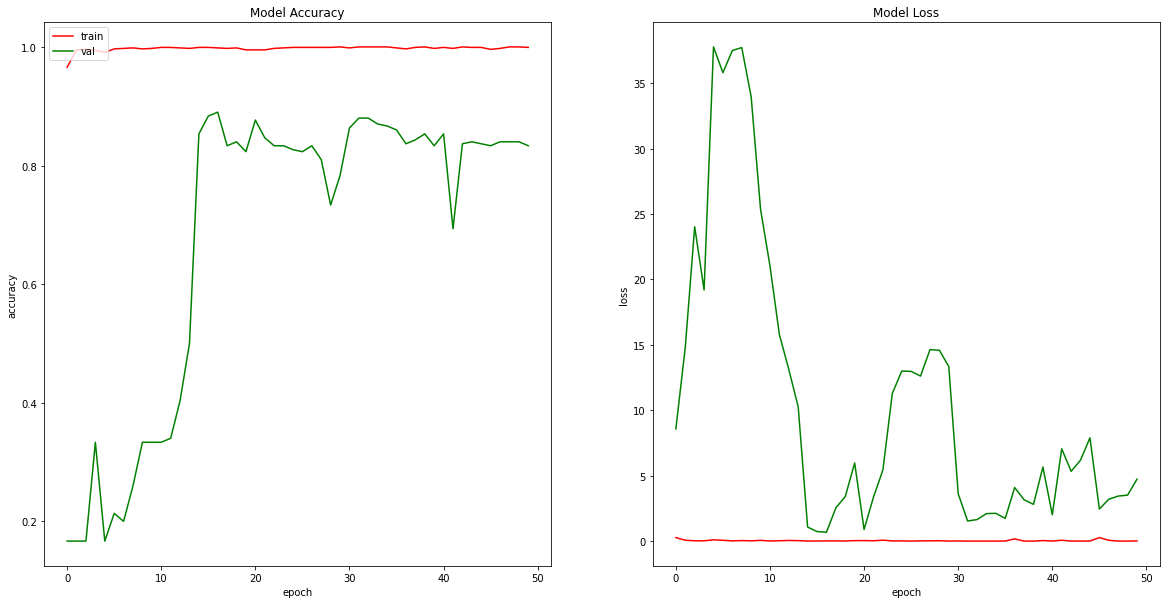

In [7]:
def plot_model_graph(r):
    fig, (axs1 , axs2) = plt.subplots(1, 2,figsize=(20,10))
    axs1.plot(r.history['accuracy'], label='acc',color='red')
    axs1.plot(r.history['val_accuracy'],label='val_acc' ,color='green')
    axs1.set_title('Model Accuracy')
    axs1.set_ylabel('accuracy')
    axs1.set_xlabel('epoch')
    axs1.legend(['train', 'val'], loc='upper left')
#     axs1.show()

    axs2.plot(r.history['loss'], label='loss',color='red')
    axs2.plot(r.history['val_loss'],label='val_loss', color='green')
    axs2.set_title('Model Loss')
    axs2.set_ylabel('loss')
    axs2.set_xlabel('epoch')

#   axs2.figure(figsize=(12,8))    axs2.legend(['train', 'val'], loc='upper left')#
    plt.show()
# axs2.show()
plot_model_graph(r)

# Real Time Face Recognition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
model = load_model('./facefeatures_model_best.h5')

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
FONT_THICKNESS=2
cap = cv2.VideoCapture(1) 
cap.set(3,640) 
cap.set(4,480)

while True:
    ret, image = cap.read()
    faces = faceCascade.detectMultiScale(image)
    for (x, y, w, h) in faces:
        crop = image[y:y+h, x:x+w]
        resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)
        resized=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        resized=resized/255
        # print(resized.shape)
        a=model.predict(resized[np.newaxis, ...])
        pred = np.argmax(a)
        print(a)
        peoples=['Ishan', 'Megh', 'Miit', 'Om', 'Shashank']
        #peoples=[0,1,2,3,4]
        print(pred)
        cv2.rectangle(image, (x, y), (x+w, y+h),  (0, 255, 0),3)
        cv2.putText(image, peoples[pred], (x, y), cv2.FONT_HERSHEY_COMPLEX, 2,  (0, 255, 0), 2, cv2.LINE_AA)
        
    cv2.imshow('video', image)
    k = cv2.waitKey(30)
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

# Localization, Recognition and Classification

In [ ]:
import numpy as np
import os
from PIL import Image
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

images_all=os.listdir("data")
model = load_model('./facefeatures_model.h5')

peoples=['Ishan', 'Megh', 'Miit', 'Om', 'Shashank']
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in images_all:
    img = cv2.imread("data/"+i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    detection = faceCascade.detectMultiScale(img) 
#     print(detection)
    count = 0
    for face in detection:
        print(detection)
        x, y, w, h = face
        crop = img[y:y+h, x:x+w]
#         plt.imshow(crop)
        resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)
        plt.imshow(resized)
        resized= resized/255.0
        a  = model.predict(resized[np.newaxis,...])
        print(a)
        pred = np.argmax(a)
        print(pred)
        name = peoples[pred]
        cv2.imwrite("All_new_images/" + name + "/" + i, img)
    
        plt.show()
    